# 第01集  方程组的几何解释


## TL;DR

在上节中，我们对 [矩阵](chapter00.ipynb) 和 [向量](chapter000.ipynb) 分别进行了简单的介绍，从这节开始我们正式进入线性代数的学习。这里会遵循“理论与代码实践相结合”的方式，从理论中学习知识点，从代码实践中实现知识点的方式，尽量的使得大家对知识点有一个更好的理解，并且这里会把知识点分的很小，避免单次出现过多的知识点而造成学习困难。

##  1.1 求解线性方程组

既然这节我们讲的是方程组的集合解释，那么我们先从一个简单的线性方程组说起：

假设我们有一个方程组 $$\begin{cases}2x&-y&=0\\-x&+2y&=3\end{cases}$$，
其中有 2 个未知数，共有两个方程。在 [矩阵](chapter00.ipynb) 那节我们知道，方程组可以写成如下的矩阵形式：

$$\begin{bmatrix}2&-1\\-1&2\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}$$

通常情况下，我们把第一个矩阵称为系数矩阵 $A$，将第二个矩阵称为向量 $x$，将第三个矩阵称为向量 $b$，于是线性方程组可以表示为：** $Ax = b$**。

* **行图像(Row Picture)：** 指将线性方程组中各个方程在空间坐标系中描绘出图像，然后观察公共部分（交点）的几何图像描述。

* **列图像(Column Picture)：**指将线性方程组不同未知数的系数向量在空间坐标系中描绘出图像，然后观察其线性组合的几何描述。

行图像和列图像是对方程组以及求解方程组的表示方式，实质上对应了看待线性方程组相应矩阵的列和行的不同视角。

## 1.2 行图像 Row Picture

对于上述方程组$\begin{cases}2x&-y&=0\\-x&+2y&=3\end{cases}$，我们来看看其行图像，即在直角坐标系中的图像。我们知道一个二元一次方程，是平面空间中的一条直线，因此我们尝试着取一些值来确定$x、y$。

例如，我们对第一个方程，$x = -2$ 时， $y = -4$，$x = 2$ 时， $y = 4$，取两个点就可以了，因为两个点可以确定一条直线。同理，对第二个方程，$x = -2$ 时， $y = 0.5$，$x = 2$ 时， $y = 2.5$。当然你也可以使用其他方式取值，例如当$x = 0$ 时， $y = 0$ 等等。

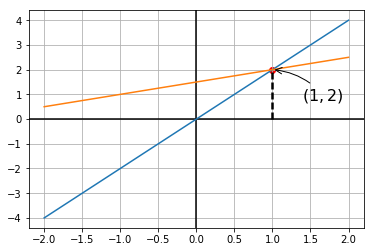

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


x = [-2, 2, -2, 2]
y = [-4, 4, 0.5, 2.5]

fig = plt.figure()
plt.axhline(y = 0, c = 'black')
plt.axvline(x = 0, c = 'black')
plt.grid(True)

plt.plot(x[:2], y[:2], x[2:], y[2:])

x0 = 1
y0 = 2
plt.plot([x0, x0,], [0, y0,], 'k--', linewidth=2.5)

plt.scatter(1,2,color='red',marker='o')

plt.annotate(r'$(1, 2)$', xy=(x0, y0), xycoords='data', xytext=(+30, -30),
             textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))

plt.show()

从上图可以直观的看到，两条直线相交于一点，这个点的坐标就是上述方程组的解。由上图可知，方程组的解为： $(1, 2)$。

## 1.3 列图像 Column Picture

我们已经知道列图像是关于未知数系数向量的，因此我们先来改造一下方程组，换成列向量的形式书写：

$$x\begin{bmatrix}2\\-1\end{bmatrix}+y\begin{bmatrix}-1\\2\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}$$

将方程中每个未知数的系数进行提取，最终得到一个系数的向量和未知数组合的形式。通常情况下，我们把第一个向量称为$col_1$，第二个向量称为$col_2$，分别表示第一列向量和第二列向量。其中的未知数$x、y$分别称为变量$x$和标量$y$，他们之间的组合 $x col_1 + y col_2$ 称为 $col_1$ 和 $col_2$ 一个**线性组合**。

> **线性组合（Linear combination）** 是线性代数中具有如下形式的表达式。

> $w = a_1 v_1 + a_2 v_2 + \cdots + a_n v_n$

> 其中 $v_i$ 为任意类型的项，$a_i$为标量。这些标量称为线性组合的系数或权。

那么对于$x\begin{bmatrix}2\\-1\end{bmatrix}+y\begin{bmatrix}-1\\2\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}$来说，我们需要找到满足如下要求的标量 $x、y$，使得两者分别于向量 $\begin{bmatrix}2\\-1\end{bmatrix}$ 和 向量 $\begin{bmatrix}-1\\2\end{bmatrix}$ 相乘之和等于向量 $\begin{bmatrix}0\\3\end{bmatrix}$。

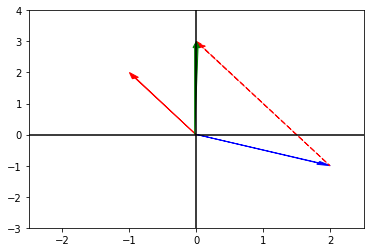

In [60]:
from functools import partial

fig = plt.figure()
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
ax = plt.gca()
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-3, 4)

arrow_vector = partial(plt.arrow, width=0.01, head_width=0.1, head_length=0.2, length_includes_head=True)

arrow_vector(0, 0, 2, -1, color='b')
arrow_vector(0, 0, -1, 2, color='r')
arrow_vector(2, -1, -2, 4, color='r',ls='--')
arrow_vector(0, 0, 0, 3, width=0.05, color='g')
plt.draw()

观察上图，蓝色向量为 $\begin{bmatrix}2\\-1\end{bmatrix}$，红色向量为 $\begin{bmatrix}-1\\2\end{bmatrix}$，而绿色向量就是 $\begin{bmatrix}0\\3\end{bmatrix}$。

蓝色向量 $\begin{bmatrix}2\\-1\end{bmatrix}$ 乘以标量 1 和红色向量 $\begin{bmatrix}-1\\2\end{bmatrix}$ 乘以标量 2 （图中红色虚线向量）做向量加法（向量按序首尾相加），就可以得到绿色向量 $\begin{bmatrix}0\\3\end{bmatrix}$，由此可得方程的解为 $x = 1, y = 2$。

**思考**：假如我们任意取$x、y$，则得到的线性组合是什么呢？

结果就是以上列向量的所有线性组合，几何表示将会铺满整个坐标平面。如下图：

![](resource/linear-combintion.jpg)

## 1.4  3x3 线性方程组

上述例子均为2x2的线性方程组，还是比较容易作图求解的，那么3x3线性方程组该如何求解呢？加入我们有如下的方程组：

$$\begin{cases}2x&-y&&=0\\-x&+2y&-z&=-1\\&-3y&+4z&=4\end{cases}$$

首先我们将其转化为矩阵的形式：

$$A=\begin{bmatrix}2&-1&0\\-1&2&-1\\0&-3&4\end{bmatrix},\ b=\begin{bmatrix}0\\-1\\4\end{bmatrix}$$


3x3 线性方程组的行图像（Row Picture）

由于我们的方程组中含有三个未知数，因此这里是在一个三维的坐标系中进行的，另外每一个方程都将确定一个平面，上述方程组将在三维空间出绘制出三个平面，这三个平面将会相交于一点，这个点就是这个方程组的解。但是相对来说，三维坐标系下的作图对于我们来说并不是那么简单了。那么假如是四维、五维等等呢，就更加不好进行了。那么该如何解决这种情况呢?下面我们来看看3x3 线性方程组的列图像（Column Picture）。

3x3 线性方程组的列图像（Column Picture）

首先我们将方程组转化为向量与标量线性组合的形式：

$$x\begin{bmatrix}2\\-1\\0\end{bmatrix}+y\begin{bmatrix}-1\\2\\-3\end{bmatrix}+z\begin{bmatrix}0\\-1\\4\end{bmatrix}=\begin{bmatrix}0\\-1\\4\end{bmatrix}$$

从上面的转化可以看到，右侧的向量 $b$ 和系数矩阵 $A$ 的列3的值相同，因此 $x = 0, y = 0, z = 1$。

当然了，这是一个特殊的三元方程组，在大部分的情况下，我们并不能总是这么轻易的求出正确的线性组合，所以下一讲将介绍**消元法**——一种线性方程组的系统性解法。



思考一个问题，无论右侧向量 $b$ 是多少，是否都能求解方程？等价于代数问题：对任意向量 $b$，能否求解 $Ax=b$ ？ 用“线性组合”语言来描述：系数矩阵 $A$ 的三个列向量的线性组合，能否覆盖整个三维空间？

对于我们上面用到的系数矩阵 $A$，答案是肯定的。因为它是一个**非奇异矩阵**，它是 **可逆矩阵** 。

但是对于有的系数矩阵，答案是否定的。例如，如果系数矩阵的三个列向量在一个平面内（例如，列3等于列1加上列2），那么它们的线性组合也必定在这个平面内。因此，当右侧向量 $b$ 处在这个平面内，则方程有解，否则无解。这种情形称为 奇异，矩阵并非 可逆。

## 矩阵乘以向量

在最开始的时候，我们介绍了 $Ax = b$ 的等式，其实它是一种线性方程的矩阵形式，也属于一种乘法运算。那么对于矩阵 $A$ 乘以向量 $x (Ax)$ 得到的是什么结果呢？举例说明：

假设我们有一个矩阵 $A$，向量 $x$，其值分别如下：

$$A=\begin{bmatrix}2&5\\1&3\end{bmatrix},\ x=\begin{bmatrix}1\\2\end{bmatrix}$$

那么 

$$\begin{bmatrix}2&5\\1&3\end{bmatrix} \begin{bmatrix}1\\2\end{bmatrix} = ?$$

有两种方法可以求解。

### No. 1  一次一列法

$$\begin{bmatrix}2&5\\1&3\end{bmatrix}\begin{bmatrix}1\\2\end{bmatrix}=1\begin{bmatrix}2\\1\end{bmatrix}+2\begin{bmatrix}5\\3\end{bmatrix}=\begin{bmatrix}12\\7\end{bmatrix}$$

如何理解呢？$Ax$（矩阵 $A$ 乘以向量 $x$） 可以理解矩阵 $A$ 的各列的线性组合。 


### No. 2  一次一行法

$$\begin{bmatrix}2&5\end{bmatrix}\cdot\begin{bmatrix}1&2\end{bmatrix}^T=12,\ \begin{bmatrix}1&3\end{bmatrix}\cdot\begin{bmatrix}1&2\end{bmatrix}^T=7$$

或者更直观点的写法：

$$\begin{bmatrix}2&5\\1&3\end{bmatrix}\begin{bmatrix}1\\2\end{bmatrix}=\begin{bmatrix}2 * 1 + 5 * 2\\1 * 1 + 3 * 2\end{bmatrix} = \begin{bmatrix}12\\7\end{bmatrix}$$